正态分布公式:    
$$p = \frac{1}{\sqrt{2*\pi}\sigma}e^{\frac{(x-\mu)^2}{2\sigma ^2}}$$

In [12]:
# -*- coding: utf-8 -*-

import numpy as np

# 高斯朴素贝叶斯实现
class GussNB:
    
    def normal(self, x, mu, std):
        """
        正态分布实现
        """
        a = 1/(np.sqrt(2*np.pi)*std)
        return a*np.exp(-(x-mu)**2/(2*std**2))
    
    def logN(self, x, c):
        if c==0:
            return np.log(self.normal(x, self.mu1, self.std1))
        else:
            return np.log(self.normal(x, self.mu2, self.std2))
        
    def fit(self, X, y):
        # 挑出正负样本
        X0 = X[y==0]
        X1 = X[y==1]
        '''计算先验概率'''
        self.mu1 = np.mean(X0, axis=0)
        self.mu2 = np.mean(X0, axis=0)
        self.std1 = np.std(X0, axis=0)
        self.std2 = np.std(X1, axis=0)
        
    def predict_proba(self, xx):
        # 准确率预测
        prb = []
        '''计算预测数据每一类的概率'''
        for x in xx:
            # 这里有无问题? 没有加先验
            prb1_log = np.sum(self.logN(x, 0)+1**-6)
            prb2_log = np.sum(self.logN(x, 1)+1**-6)
            prb1 = np.exp(prb1_log)
            prb2 = np.exp(prb2_log)
            prb_1 = prb1 / (prb1 + prb2)
            prb_2 = prb2 / (prb1 + prb2)
            prb.append([prb_1, prb_2])
        return np.array(prb)

from sklearn.datasets import make_moons, make_circles, make_classification
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)
method = GussNB()
method.fit(X, y)

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [14]:
# 等高线
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

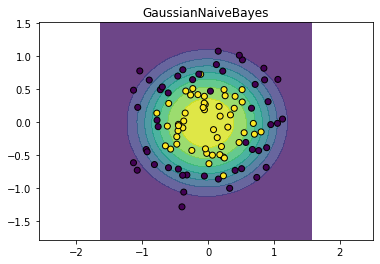

In [15]:
Z = method.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("GaussianNaiveBayes")
plt.axis("equal")
plt.show()